In [1]:
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh

In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP'] #, 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}

In [7]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
mfield_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift', 'datetime']

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2021, 4, 13)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y', '10y']

sim_products = ind_all_mkts + ags_all_mkts
need_shift = 1
freq = 'd'
delimiter = '-'

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
dbtbl_prefix = ''
args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
v_args  = {'roll_rule': '-28b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []
atr_win = 20
for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date    
    for idy, nb in enumerate([1, 2]):
        use_args['n'] = nb
        print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
        df = misc.nearby(asset, **use_args)
        if freq == 'm':
            df = misc.cleanup_mindata(df, asset)
        if (idx == 0) and (idy == 0) and (freq == 'm'):
            df_list.append(df[['date', 'min_id']])
        xdf = df[field_list]
        #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 1}
loading mkt = i, nb = 2, args =

loading mkt = bu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 9, 15), 'end_date': datetime.date(2021, 4, 13), 'n': 1}
loading mkt = bu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 9, 15), 'end_date': datetime.date(2021, 4, 13), 'n': 2}
loading mkt = sc, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 8, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 1}
loading mkt = sc, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 8, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 2}
loading mkt = fu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2021, 4, 13), 'n': 1}
loading mkt = fu, nb = 2, ar

[20 rows x 740 columns]


In [8]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    resp_func = input_args.get('rsp_func', 'sign')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    data_field = ''
    for col in df.columns:
        col_split = col.split(delimiter)
        if col_split[0][:-1] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        
        if run_mode == 'ryield':
            data_field = 'ryield'
        elif run_mode == 'basmom':
            data_field = 'basmom'
        elif run_mode == 'ryieldma':
            xdf[delimiter.join((asset + str(1), 'ryieldma'))] = xdf[delimiter.join((asset + str(1), 'ryield'))].rolling(ma_win).mean()
            data_field = 'ryieldma'
        elif run_mode == 'basmomma':
            xdf[delimiter.join((asset + str(1), 'basmomma'))] = xdf[delimiter.join((asset + str(1), 'basmom'))].rolling(ma_win).mean()
            data_field = 'basmomma'
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill') * 10.0
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        if 'ma' == run_mode[-2:]:
            xdf[delimiter.join((asset + str(1), 'signal_r'))] = xdf[delimiter.join((asset + str(1), data_field))] \
                                                            - xdf[delimiter.join((asset + str(1), data_field[:-2]))]
        else:
            xdf[delimiter.join((asset + str(1), 'signal_r'))] = xdf[delimiter.join((asset + str(1), data_field))] - params[0]
        

    select_cols = []
    for col in xdf.columns:
        col_split = col.split(delimiter)
        if (col_split[0] in mod_prod_list):
            select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    adf['rebal_seqno'] = range(len(adf.index))
    
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            if run_mode in ['ryield', 'basmom']:
                long_tmp.loc[(adf[delimiter.join((asset, data_field))]>  params[0]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(adf[delimiter.join((asset, data_field))]<= params[0]) & rebal_flag, asset] = 0.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]< params[1]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]>=params[1]) & rebal_flag, asset] = 0.0
            elif run_mode in ['ryieldma', 'basmomma']:
                long_tmp.loc[(adf[delimiter.join((asset, data_field))] < adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(adf[delimiter.join((asset, data_field))] >=adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 0.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]> adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]<=adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp
        short_pos = short_pos + short_tmp
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk / rebal_freq \
                    /(adf['prod_count'] * adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk / rebal_freq \
                    /(adf['prod_count'] *adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, 'open'))]
        adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res


In [9]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    rank_field = ''
    for col in df.columns:
        col_split = col.split(delimiter)
        if col_split[0][:-1] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]

    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        if run_mode in ['ryield', 'basmom']:
            rank_field = run_mode
        elif run_mode == 'ryieldma':
            xdf[delimiter.join((asset + str(1), 'ryieldma'))] = xdf[delimiter.join((asset + str(1), 'ryield'))].rolling(ma_win).mean()
            rank_field = 'ryieldma'
        elif run_mode == 'basmomma':
            xdf[delimiter.join((asset + str(1), 'basmomma'))] = xdf[delimiter.join((asset + str(1), 'basmom'))].rolling(ma_win).mean()
            rank_field = 'basmomma'
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill') * 10.0
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close

    select_cols = []
    for col in xdf.columns:
        col_split = col.split(delimiter)
        if (col_split[0] in mod_prod_list):
            select_cols.append(col)    
    
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_sum = long_tmp.sum(axis=1)
        short_sum = short_tmp.sum(axis=1)
        long_pos = long_pos + long_tmp.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp.div(short_sum,axis=0)

    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk / rebal_freq \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk / rebal_freq \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, 'open'))]
        adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res

<ipython-input-21-3a9366cbd794>:77: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_pnl = pd.Series()
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


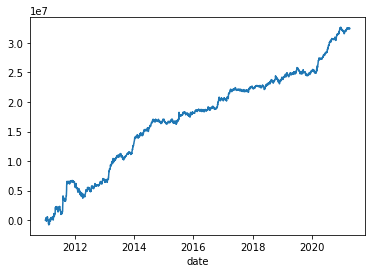

                 tscarry-ryield-commod_mkts-1-1-1-0.2
sharp_ratio_10y                              1.741892
sharp_ratio_1y                               3.680345
sharp_ratio_2y                               2.319453
sharp_ratio_3y                               2.063661
sharp_ratio_4y                               1.754579
sharp_ratio_5y                               1.804266
sharp_ratio_6y                               1.634740
sharp_ratio_8y                               1.789380
std_pnl_10y                             120366.767325
std_pnl_1y                               91300.541120
std_pnl_2y                              106096.903724
std_pnl_3y                              103011.742989
std_pnl_4y                               97167.200400
std_pnl_5y                               99132.355772
std_pnl_6y                              102572.476757
std_pnl_8y                              103415.081048


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


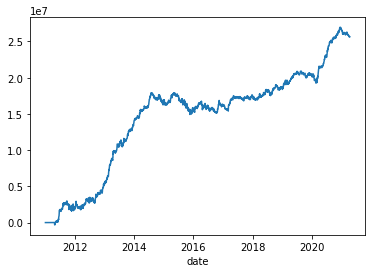

                 tscarry-basmom-commod_mkts-70-1-1-0.2
sharp_ratio_10y                               1.458055
sharp_ratio_1y                                3.077328
sharp_ratio_2y                                1.894070
sharp_ratio_3y                                1.768687
sharp_ratio_4y                                1.454329
sharp_ratio_5y                                1.176231
sharp_ratio_6y                                0.836517
sharp_ratio_8y                                1.261843
std_pnl_10y                              114851.829790
std_pnl_1y                                90352.453929
std_pnl_2y                               102523.646734
std_pnl_3y                               101695.280089
std_pnl_4y                                96822.416709
std_pnl_5y                                99432.341293
std_pnl_6y                               106591.412632
std_pnl_8y                               108949.145422


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


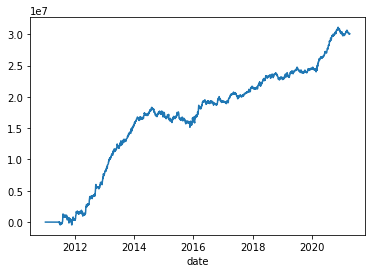

                 tscarry-basmom-commod_mkts-110-1-1-0.2
sharp_ratio_10y                                1.673183
sharp_ratio_1y                                 2.897142
sharp_ratio_2y                                 2.042957
sharp_ratio_3y                                 1.837461
sharp_ratio_4y                                 1.673022
sharp_ratio_5y                                 1.573130
sharp_ratio_6y                                 1.425310
sharp_ratio_8y                                 1.432130
std_pnl_10y                               117322.224004
std_pnl_1y                                 91132.063373
std_pnl_2y                                 98391.151223
std_pnl_3y                                 97164.547593
std_pnl_4y                                 94784.519342
std_pnl_5y                                 95213.911469
std_pnl_6y                                106148.890494
std_pnl_8y                                110474.595270


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


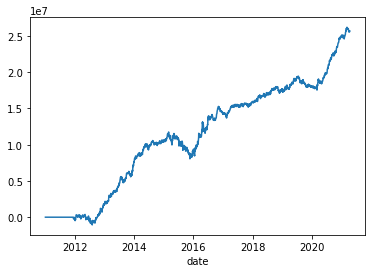

                 tscarry-basmom-commod_mkts-230-1-1-0.2
sharp_ratio_10y                                1.495537
sharp_ratio_1y                                 5.037960
sharp_ratio_2y                                 2.459493
sharp_ratio_3y                                 2.030052
sharp_ratio_4y                                 1.809012
sharp_ratio_5y                                 1.786486
sharp_ratio_6y                                 1.428051
sharp_ratio_8y                                 1.577574
std_pnl_10y                               112055.891867
std_pnl_1y                                 91975.595306
std_pnl_2y                                 98696.310268
std_pnl_3y                                 97249.066488
std_pnl_4y                                 95145.553406
std_pnl_5y                                103347.677957
std_pnl_6y                                117942.520344
std_pnl_8y                                116175.038605


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


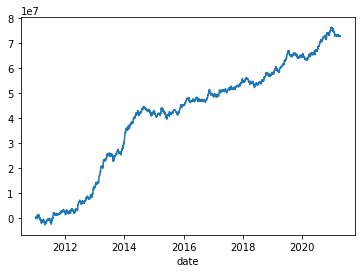

                 xscarry-ryieldma-commod_mkts-1-1-1-0.2
sharp_ratio_10y                                1.630568
sharp_ratio_1y                                 1.858102
sharp_ratio_2y                                 1.434112
sharp_ratio_3y                                 1.517411
sharp_ratio_4y                                 1.353108
sharp_ratio_5y                                 1.245244
sharp_ratio_6y                                 1.162494
sharp_ratio_8y                                 1.448385
std_pnl_10y                               295502.182012
std_pnl_1y                                286112.677930
std_pnl_2y                                281574.172095
std_pnl_3y                                272040.775171
std_pnl_4y                                265094.854757
std_pnl_5y                                272713.376261
std_pnl_6y                                278073.416995
std_pnl_8y                                294124.968663


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


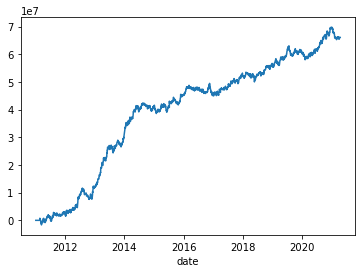

                 xscarry-ryieldma-commod_mkts-1-30-1-0.2
sharp_ratio_10y                                 1.414313
sharp_ratio_1y                                  1.496248
sharp_ratio_2y                                  0.806986
sharp_ratio_3y                                  1.099176
sharp_ratio_4y                                  1.074024
sharp_ratio_5y                                  0.861930
sharp_ratio_6y                                  0.929239
sharp_ratio_8y                                  1.218891
std_pnl_10y                                302184.322804
std_pnl_1y                                 290830.694507
std_pnl_2y                                 286728.041507
std_pnl_3y                                 282426.906690
std_pnl_4y                                 277159.461642
std_pnl_5y                                 285017.182556
std_pnl_6y                                 291617.354308
std_pnl_8y                                 302741.828780


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


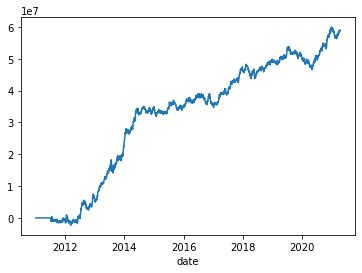

                 xscarry-ryieldma-commod_mkts-1-120-1-0.2
sharp_ratio_10y                                  1.283077
sharp_ratio_1y                                   2.473971
sharp_ratio_2y                                   0.925848
sharp_ratio_3y                                   1.103253
sharp_ratio_4y                                   1.116429
sharp_ratio_5y                                   1.018518
sharp_ratio_6y                                   0.974066
sharp_ratio_8y                                   1.266700
std_pnl_10y                                 300088.042914
std_pnl_1y                                  302306.497455
std_pnl_2y                                  295386.856167
std_pnl_3y                                  288343.247015
std_pnl_4y                                  286016.451336
std_pnl_5y                                  289520.379539
std_pnl_6y                                  289182.250235
std_pnl_8y                                  307861.886314


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


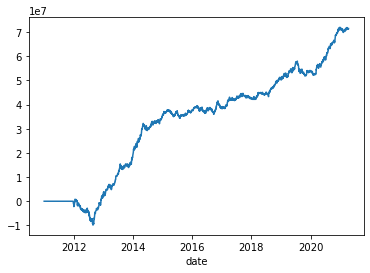

                 xscarry-basmom-commod_mkts-240-1-1-0.2
sharp_ratio_10y                                1.569186
sharp_ratio_1y                                 3.551683
sharp_ratio_2y                                 1.915836
sharp_ratio_3y                                 1.983197
sharp_ratio_4y                                 1.677003
sharp_ratio_5y                                 1.508507
sharp_ratio_6y                                 1.341942
sharp_ratio_8y                                 1.863363
std_pnl_10y                               297082.853380
std_pnl_1y                                293923.246463
std_pnl_2y                                302227.692948
std_pnl_3y                                292630.572391
std_pnl_4y                                280710.774594
std_pnl_5y                                285374.697641
std_pnl_6y                                277333.709934
std_pnl_8y                                290364.953443


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


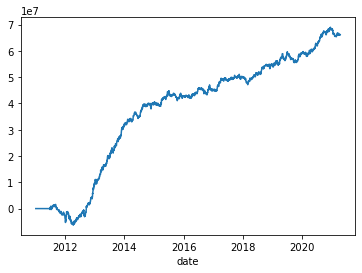

                 xscarry-basmomma-commod_mkts-100-10-5-0.2
sharp_ratio_10y                                   1.512248
sharp_ratio_1y                                    1.711413
sharp_ratio_2y                                    1.076664
sharp_ratio_3y                                    1.383534
sharp_ratio_4y                                    1.085368
sharp_ratio_5y                                    1.139207
sharp_ratio_6y                                    1.023700
sharp_ratio_8y                                    1.526298
std_pnl_10y                                  285758.955749
std_pnl_1y                                   262642.600610
std_pnl_2y                                   268078.318157
std_pnl_3y                                   266100.327303
std_pnl_4y                                   256329.156825
std_pnl_5y                                   262352.109519
std_pnl_6y                                   260892.152694
std_pnl_8y                                   272536.1068

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


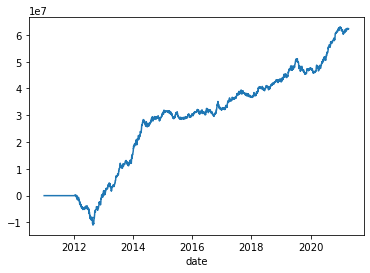

                 xscarry-basmomma-commod_mkts-240-10-5-0.2
sharp_ratio_10y                                   1.393460
sharp_ratio_1y                                    3.447698
sharp_ratio_2y                                    1.674536
sharp_ratio_3y                                    1.672312
sharp_ratio_4y                                    1.541347
sharp_ratio_5y                                    1.430970
sharp_ratio_6y                                    1.242367
sharp_ratio_8y                                    1.706025
std_pnl_10y                                  291949.234548
std_pnl_1y                                   289121.330917
std_pnl_2y                                   296901.888512
std_pnl_3y                                   287201.855678
std_pnl_4y                                   278450.841447
std_pnl_5y                                   283373.792174
std_pnl_6y                                   274202.265022
std_pnl_8y                                   288763.7588

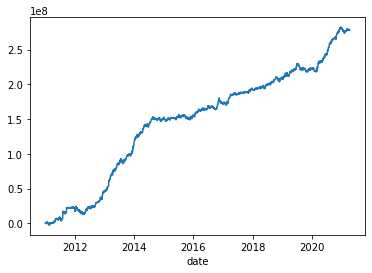

date
2021-03-02    2.774930e+08
2021-03-03    2.784768e+08
2021-03-04    2.783302e+08
2021-03-05    2.787142e+08
2021-03-08    2.783684e+08
2021-03-09    2.797383e+08
2021-03-10    2.785995e+08
2021-03-11    2.788569e+08
2021-03-12    2.791912e+08
2021-03-15    2.790042e+08
2021-03-16    2.795664e+08
2021-03-17    2.791587e+08
2021-03-18    2.790105e+08
2021-03-19    2.786093e+08
2021-03-22    2.788367e+08
2021-03-23    2.784995e+08
2021-03-24    2.791713e+08
2021-03-25    2.794184e+08
2021-03-26    2.795150e+08
2021-03-29    2.779100e+08
2021-03-30    2.780515e+08
2021-03-31    2.775315e+08
2021-04-01    2.776747e+08
2021-04-02    2.773726e+08
2021-04-06    2.778772e+08
2021-04-07    2.783925e+08
2021-04-08    2.782359e+08
2021-04-09    2.782561e+08
2021-04-12    2.778252e+08
2021-04-13    2.781596e+08
Name: daily_pnl, dtype: float64
                             0
sharp_ratio_10y       2.219134
sharp_ratio_1y        3.904875
sharp_ratio_2y        2.329567
sharp_ratio_3y        2.21469

In [21]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'ni', 'sn', \
               'l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd'] 
# 'SM', "SF", 'au', 'ag', 'fu', 'eg', 'b', 'AP']

product_list = commod_mkts # metal_mixed_mkts + petro_mixed_mkts # 
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts'

sim_name = 'tscarry'
run_mode = 'nryield'

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2021,4,13)
quant = 0.2
#save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quant), str(end_date)]))
save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'
pos_std = 1
std_win = 20
win = 60
ma_win = 1
rebal = 5
params = [0.0, 0.0]

#index_list = range(10, 250, 10) # [1, 5] + [i for i in range(10, 130, 10)]  #range(8, 44, 4) # 
#column_list = [1, 3, 5, 10, 15, 20] #range(10, 130, 10) #  [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #
sratio = {}
run_sratio = False
run_pos_sum = True
pos_sum = pd.DataFrame()
pos_list = []
#scenarios = list(itertools.product(index_list, column_list))
#ind_metal_mkts
#scenarios = [('tscarry', 'ryield', 3.0, 1, 1, 5, [0.0, 0.0]), \
#             ('tscarry', 'basmom', 1.0, 60, 1, 10, [0.0, 0.0]), \
#             ('tscarry', 'basmom', 1.0, 100, 1, 10, [0.0, 0.0]),\
#             ('tscarry', 'basmom', 1.0, 240, 1, 10, [0.0, 0.0]),\
#             ('xscarry', 'ryieldma', 0.4, 1, 1, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'ryieldma', 0.4, 1,50, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'basmom', 0.2, 110, 1, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'basmom', 0.2, 140, 1, 5, [0.0, 0.0], 0.25), 
#             ('xscarry', 'basmomma', 0.2, 90, 20, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'basmomma', 0.2, 230, 20, 5, [0.0, 0.0], 0.25), ]
#('xscarry', 'basmom', 170, 1, 5, [0.0, 0.0], 0.25), \
#('xscarry', 'basmom', 210, 1, 5, [0.0, 0.0], 0.25), \
#commod_mkts
scenarios = [('tscarry', 'ryield', 3.0, 1, 1, 1, [0.0, 0.0]), \
             ('tscarry', 'basmom', 1.0, 70, 1, 1, [0.0, 0.0]), \
             ('tscarry', 'basmom', 1.0, 110, 1, 1, [0.0, 0.0]),\
             ('tscarry', 'basmom', 1.0, 230, 1, 1, [0.0, 0.0]),\
             ('xscarry', 'ryieldma', 0.25, 1, 1, 1, [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldma', 0.25, 1, 30, 1, [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldma', 0.25, 1, 120, 1, [0.0, 0.0], 0.2),\
             #('xscarry', 'basmom', 1.0, 10, 1, 10, [0.0, 0.0], 0.2), \
             #('xscarry', 'basmom', 1.0, 30, 1, 10, [0.0, 0.0], 0.2), \
             #('xscarry', 'basmom', 0.75, 100, 1, 1, [0.0, 0.0], 0.2), \
             ('xscarry', 'basmom', 0.25, 240, 1, 1, [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomma', 0.25, 100, 10, 5, [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomma', 0.25, 240, 10, 5, [0.0, 0.0], 0.2), \
           ]

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()

for scen in scenarios:
    quantile = quant
    if len(scen) == 2:
        scen_x = scen[0]
        scen_y = scen[1]
        if run_mode in ['ryield']:
            win = 1
            ma_win = 1
            rebal = scen_y 
            if sim_name == 'xscarry':
                quantile = scen_x * 0.1
        elif run_mode in ['basmom']:
            win = scen_x
            ma_win = 1
            rebal = scen_y
        elif run_mode in ['basmomma']:
            win = scen_x
            ma_win = scen_y
            rebal = 5
        elif run_mode in ['nyield']:
            win = scen_x
            
        elif run_mode == 'ryieldma':
            rebal = scen_y
            ma_win = scen_x
        else:
            print("unsupported run_mode")
            continue
    elif len(scen) >= 7:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 7:
                quantile = scen[6]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        params = scen[6]
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = 0.5
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile 
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(port_pnl[-30:])
print(vdf)
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:
    print(pos_sum)
if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])


In [7]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    
if run_sratio and save_xl:
    xlfile = save_loc + "sratio_heatmap.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for yr in sratio_years:
        lbl = 'sharp_ratio_' + str(yr) + 'y'
        sratio[yr].to_excel(writer, lbl, startcol= 0, startrow=1)
    writer.save()    